In [ ]:
#Analysis
#The temperature and hunidity rises when closer to Odegree latitude

In [ ]:
#Starter code for random choice was difficult to understand hence ran the code with sample cities

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"
#output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [9]:
#Test perform API calls for multiple city 
#Not sure how to get random city list
# Construct a Query URL for the OpenWeatherMap for 1 city
url = "http://api.openweathermap.org/data/2.5/weather?"
#city = "tasiilaq"
"metric"
query_url = f"{url}appid={api_keys}&units={units}&q="

# set up lists to hold reponse info
cities = ["London", "Paris", "Las Vegas", "Stockholm", "Sydney", "Hong Kong"]
cntry = []
lat = []
lon = []
tempmx = []
pres = []
humd = []
cloud = []
wspd = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    cntry.append(response['sys']['country'])
    lat.append(response['coord']['lat'])
    lon.append(response['coord']['lon'])
    tempmx.append(response['main']['temp_max'])
    pres.append(response['main']['pressure'])
    humd.append(response['main']['humidity'])
    cloud.append(response['clouds']['all'])
    wspd.append(response['wind']['speed'])

print(f"The country information received is: {cntry}")
print(f"The latitude information received is: {lat}")
print(f"The longitude information received is: {lon}")
print(f"The temperature information received is: {tempmx}")
print(f"The pressure information received is: {pres}")
print(f"The Humidity information received is: {humd}")
print(f"The Cloudiness information received is: {cloud}")
print(f"The Wind Speed information received is: {wspd}")



The country information received is: ['GB', 'FR', 'US', 'SE', 'AU', 'CN']
The latitude information received is: [51.51, 48.86, 36.17, 59.33, -33.85, 22.28]
The longitude information received is: [-0.13, 2.35, -115.15, 18.07, 151.22, 114.16]
The temperature information received is: [64.4, 59, 89.96, 53.6, 78.8, 91.4]
The pressure information received is: [1018, 1024, 1008, 1013, 1017, 1009]
The Humidity information received is: [77, 87, 26, 93, 64, 52]
The Cloudiness information received is: [64, 0, 1, 0, 0, 20]
The Wind Speed information received is: [16.11, 4.7, 3.65, 4.7, 24.16, 10.29]


In [11]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "City": cities,
    "Cloudiness": cloud,
    "Country": cntry,
    "Lat": lat,
    "Lng": lon,
    "Humidity": humd,
    "Max Temp": tempmx,
    "Wins Speed": wspd,
}

weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Cloudiness,Country,Lat,Lng,Humidity,Max Temp,Wins Speed
0,London,64,GB,51.51,-0.13,77,64.40,16.11
1,Paris,0,FR,48.86,2.35,87,59.00,4.70
2,Las Vegas,1,US,36.17,-115.15,26,89.96,3.65
3,Stockholm,0,SE,59.33,18.07,93,53.60,4.70
4,Sydney,0,AU,-33.85,151.22,64,78.80,24.16


In [14]:
# Output to csv
weather_data.to_csv(output_data_file)

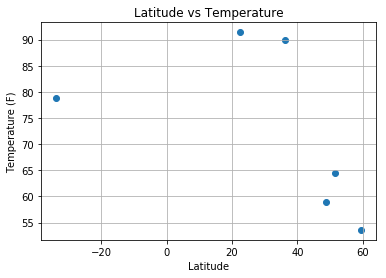

In [19]:
# Build a scatter plot temperature (F) vs. Latitude
plt.scatter(lat, tempmx, marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Temperature")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatvsTemp.png")

# Show plot
plt.show()

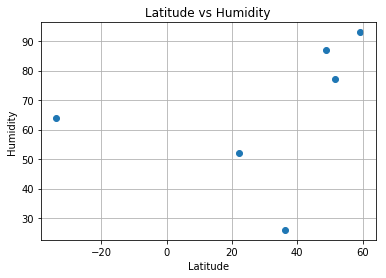

In [16]:
# Build a scatter plot Humidity vs. Latitude
plt.scatter(lat, humd, marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatvsHumd.png")

# Show plot
plt.show()

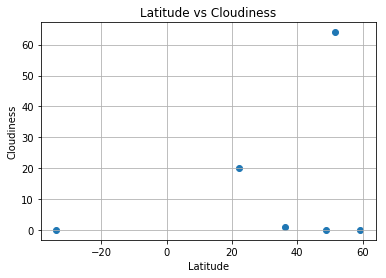

In [17]:
# Build a scatter plot Cloudiness vs. Latitude
plt.scatter(lat, cloud, marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatvsCloud.png")

# Show plot
plt.show()

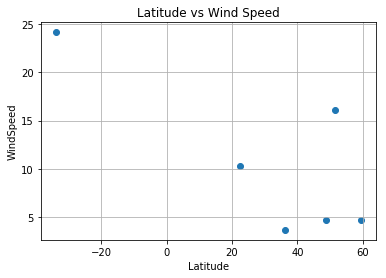

In [18]:
# Build a scatter plot Cloudiness vs. Latitude
plt.scatter(lat, wspd, marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Wind Speed")
plt.ylabel("WindSpeed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatvsWindSpeed.png")

# Show plot
plt.show()